# My question is what the probability that a random valid move is a bishop move is in chess.
# This will be an experiment, as I will play a certain number of moves in order to collect the data.
# The sample space I would be observing is all valid moves that could be played.
# One trial of the simulation would be playing a number of moves, selecting a random valid move, and finding if it is a bishop move.
# I'm measuring the outcome where a random valid move is a bishop move.

In [20]:
import sys
import site
import chess
import random as rand
import seaborn as sns
import matplotlib.pyplot as plt

!{sys.executable} -m pip uninstall -y chess python-chess
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install python-chess

if site.USER_SITE not in sys.path:
    sys.path.append(site.USER_SITE)

board = chess.Board()
print(board)

Found existing installation: chess 1.11.2
Uninstalling chess-1.11.2:
  Successfully uninstalled chess-1.11.2
Found existing installation: python-chess 1.999
Uninstalling python-chess-1.999:
  Successfully uninstalled python-chess-1.999
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Using cached python_chess-1.999-py3-none-any.whl.metadata (776 bytes)
  Using cached chess-1.11.2-py3-none-any.whl
Using cached python_chess-1.999-py3-none-any.whl (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [python-chess]
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


# Now that imports are working, let's make code to simulate 1000 trials at 3.5 moves depth using the most common opening, the Open Sicilian.
# Then, let's visualize the theoretical vs. empirical probability in a barplot.

Fraction of bishop moves (theoretical): 0.17857142857142858
Fraction of bishop moves (empirical): 0.22


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


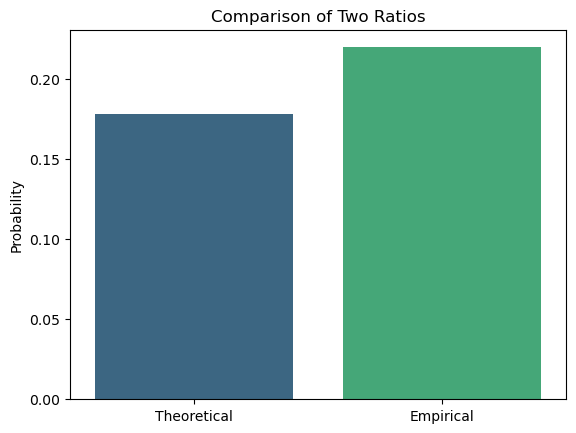

In [27]:
num_trials = 100

total_valid_moves = 0
bishop_moves = 0

board = chess.Board()
board.push_san("e4")
board.push_san("c5")
board.push_san("Nf3")
board.push_san("d6")
board.push_san("d4")
board.push_san("cxd4")
board.push_san("Nxd4")
legal_moves = list(board.legal_moves)

for trial in range(num_trials):
    move = rand.choice(legal_moves)
    san_move = board.san(move) # Standard Algebraic Notation (SAN): piece + end square (e.g. Bc4 = bishop to c4)
    lan_move = board.lan(move) # Long Algebraic Notation (LAN): start square + end square (e.g. f1c4 = piece on f1 to c4)
                               # There is also castling, the only move that can be done with 2 pieces at once, which is O-O or O-O-O
                               # Luckily, this does not appear in the Open Sicilian

    total_valid_moves += 1
    if lan_move.startswith('B'):
        bishop_moves += 1

print(f"Fraction of bishop moves (theoretical): {5 / 28}")
print(f"Fraction of bishop moves (empirical): {bishop_moves / total_valid_moves}")

# Values to plot
values = [5 / 28, bishop_moves / total_valid_moves]
labels = ['Theoretical', 'Empirical']

# Create bar plot
sns.barplot(x=labels, y=values, palette="viridis")

plt.ylabel('Probability')
plt.title('Comparison of Two Ratios')
plt.show()

# Conclusion: The probability a random valid move is a bishop move is around 0.179 according to the Open Sicilian, the most common opening.
# The empirical probability is slightly different, and differs depending on the number of trials (in this simulation, 0.22).
# As the number of trials increases, the empirical probability would gradually converge on 0.179.
# This is because the empirical probability is effectively an approximation of the theoretical probability plus or minus some variance.
# Increasing the number of trials reduces the effect of variance, making it gradually more accurate.